In [1]:
import numpy as np
from cellij.core.synthetic import DataGenerator

/Users/tim.treis/anaconda3/envs/spatialdata/envs/cellij/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Using matplotlib backend: <object object at 0x1220fdf70>


In [3]:
# plotting functions
def _lines(ax, positions, ymin, ymax, horizontal=False, **kwargs):
    if horizontal:
        ax.hlines(positions, ymin, ymax, **kwargs)
    else:
        ax.vlines(positions, ymin, ymax, **kwargs)
    return ax


def lined_heatmap(data, figsize=None, hlines=None, vlines=None, **kwargs):
    """Plot heatmap with horizontal or vertical lines."""
    if figsize is None:
        figsize = (20, 2)
    fig, g = plt.subplots(figsize=figsize)
    g = sns.heatmap(data, ax=g, **kwargs)
    if hlines is not None:
        _lines(
            g,
            hlines,
            *sorted(g.get_xlim()),
            horizontal=True,
            lw=1.0,
            linestyles="dashed",
        )
    if vlines is not None:
        _lines(
            g,
            vlines,
            *sorted(g.get_ylim()),
            horizontal=False,
            lw=1.0,
            linestyles="dashed",
        )
    return g

In [4]:
# random seed to use throughout the notebook
seed = 123

# basic parameters
n_samples = 100
n_features = [200, 200, 200]
n_views = len(n_features)
likelihoods = ["normal" for _ in range(n_views)]

# more specific parameters to the structure of the latent factors
n_fully_shared_factors = 2
n_partially_shared_factors = 15
n_private_factors = 3

# optional: number of covariates to generate
n_covariates = 2

In [5]:
dg = DataGenerator(
    n_samples,
    n_features,
    likelihoods,
    n_covariates=n_covariates,
)

rng = dg.generate(seed=seed)

# introduce missing values in the data
dg.generate_missingness(
    random_fraction=0.1, 
    n_incomplete_samples=10, 
    n_incomplete_features=50, 
    missing_fraction_incomplete_features=0.5, 
    seed=seed
    )

# center data
dg.normalize(with_std=False)

Using a uniform distribution with parameters 0.05 and 0.15 for generating the number of active factor loadings.


In [6]:
feature_offsets = [0] + np.cumsum(n_features).tolist()
vlines = feature_offsets[1:-1]

<AxesSubplot: >

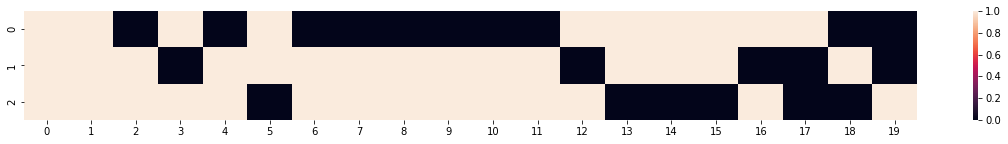

In [7]:
# view factor relationships
lined_heatmap(dg.feature_group_factor_mask)

<AxesSubplot: >

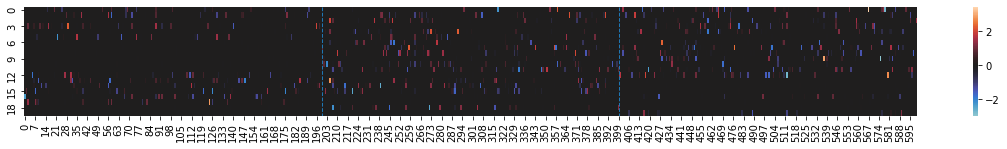

In [8]:
# factor loadings should be fairly sparse
lined_heatmap(dg.w, vlines=vlines, center=0)

<AxesSubplot: >

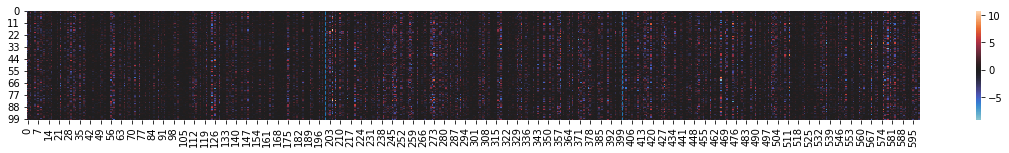

In [9]:
# observed data
lined_heatmap(dg.y, vlines=vlines, center=0)

<AxesSubplot: >

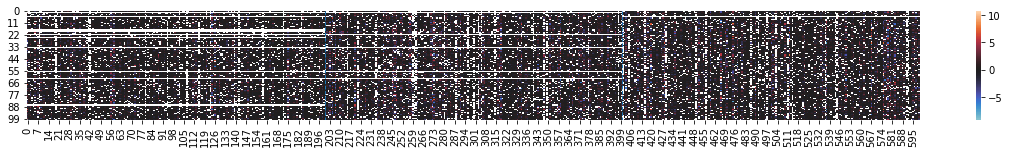

In [10]:
# missing data
lined_heatmap(dg.missing_y, vlines=vlines, center=0)